In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# 觀察男女存活人數
male_rate = len(titanic[(titanic['Sex']=='male') & (titanic['Survived']==1)]) / len(titanic[titanic['Sex'] == 'male'])
female_rate = len(titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)]) / len(titanic[titanic['Sex'] == 'female'])
print(f"{male_rate=}, {female_rate=}")

# 生成均勻分布的隨機數
male_pos = np.random.uniform(0, male_rate, len(titanic[(titanic['Sex']=='male') & (titanic['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(titanic[(titanic['Sex']=='male') & (titanic['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(titanic[(titanic['Sex']=='female') & (titanic['Survived']==0)]))

male_rate=0.18890814558058924, female_rate=0.7420382165605095


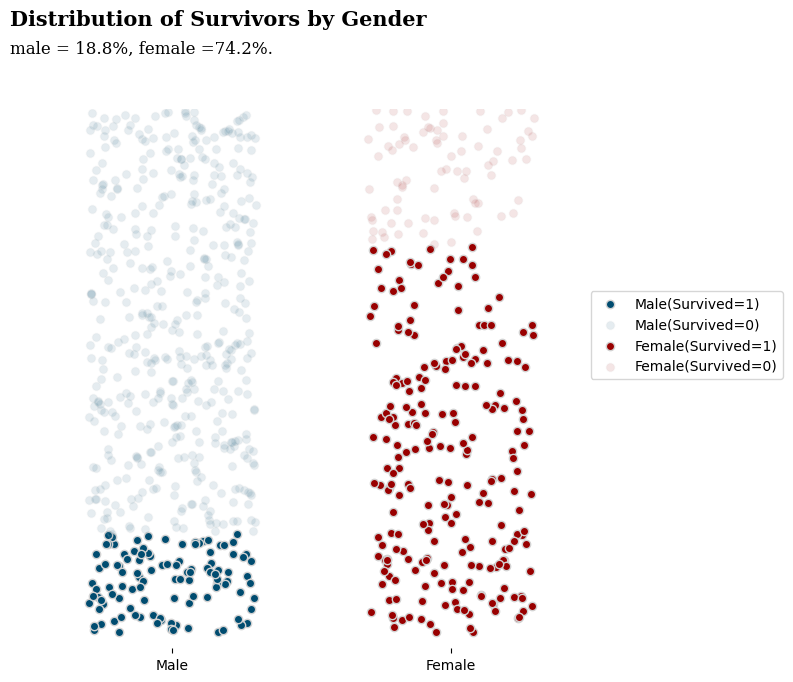

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# 男性點散圖
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', alpha=0.1, edgecolor='lightgray', label='Male(Survived=0)')

# 女性點散圖
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.1, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.03, 1.)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
ax.set_yticks([])
ax.set_ylabel('')

# 取消周圍框
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)
    

# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'male = 18.8%, female =74.2%.', fontweight='light', fontfamily='serif', fontsize=12)    
ax.legend(loc=(0.8, 0.5))

p1_rate=0.6296296296296297
p2_rate=0.47282608695652173
p3_rate=0.24236252545824846


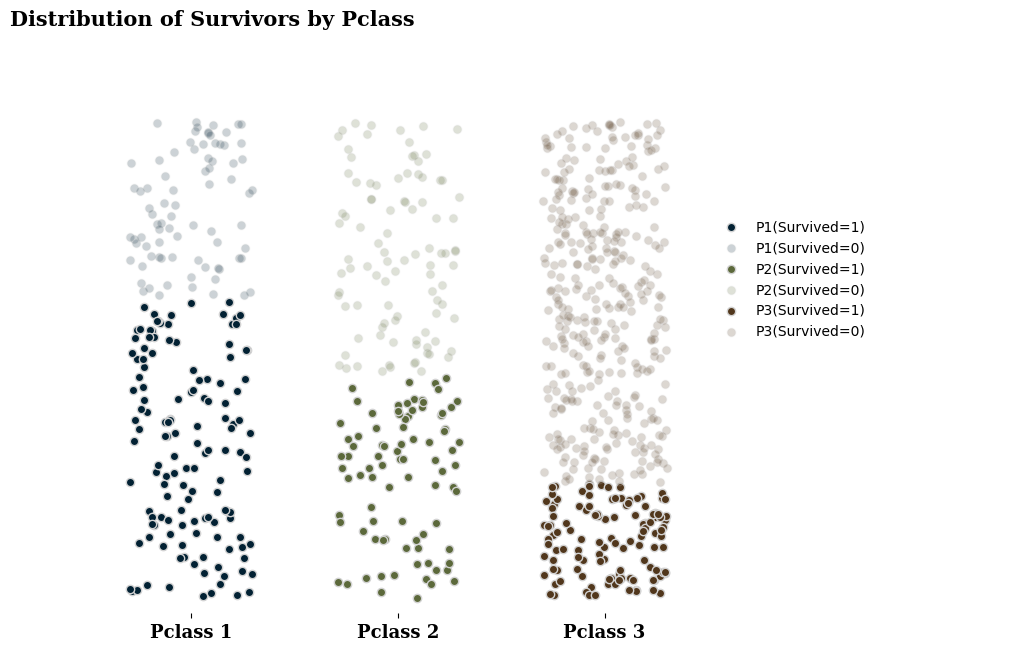

In [7]:
# 針對三個pclass作圖

for pn in range(1,4):
    globals()['p{}_rate'.format(pn)] = len(titanic[(titanic['Pclass']==pn) & (titanic['Survived']==1)]) / len(titanic[titanic['Pclass']==pn])
    globals()['p{}_pos'.format(pn)] = np.random.uniform(0, globals()['p{}_rate'.format(pn)], len(titanic[(titanic['Pclass']==pn) & (titanic['Survived']==1)]))
    globals()['p{}_neg'.format(pn)] = np.random.uniform(globals()['p{}_rate'.format(pn)], 1, len(titanic[(titanic['Pclass']==pn) & (titanic['Survived']==0)]))
    print("p{}_rate={}".format(pn, eval('p{}_rate'.format(pn))))
    
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#022133', edgecolor='lightgray', label='P1(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#022133', edgecolor='lightgray', alpha=0.2, label='P1(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#5c693b', edgecolor='lightgray', label='P2(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#5c693b', edgecolor='lightgray', alpha=0.2, label='P2(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#51371c', edgecolor='lightgray', label='P3(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#51371c', edgecolor='lightgray', alpha=0.2, label='P3(Survived=0)')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)


ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')


for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontfamily='serif', fontsize=15, ha='left')    


ax.legend(loc=(0.67, 0.5), edgecolor='None')

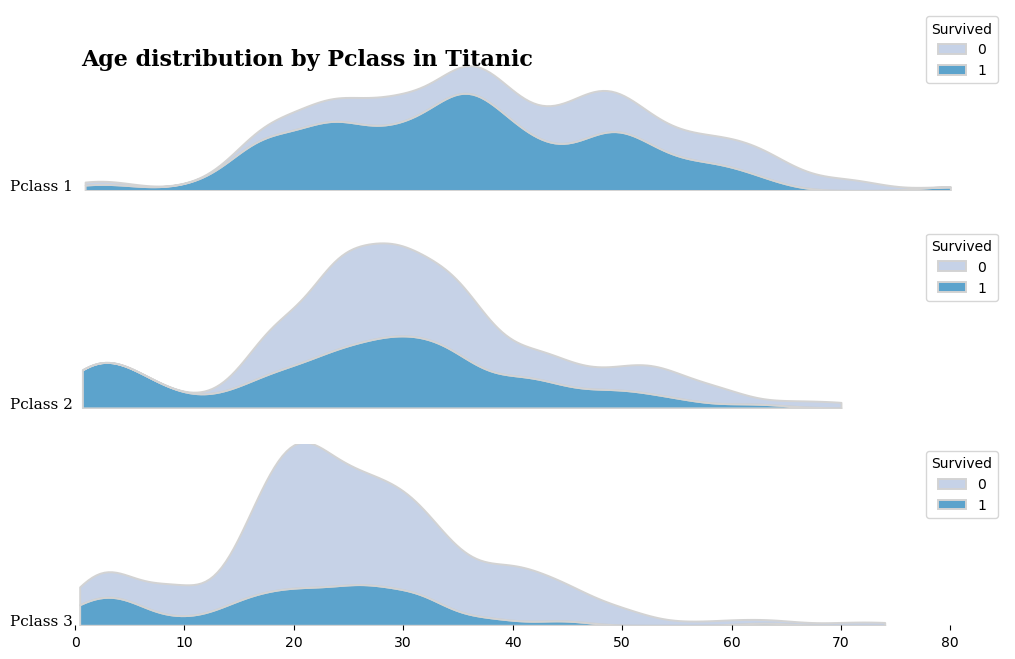

In [8]:
# 觀察不同艙別與年齡間的存活率

fig = plt.figure(figsize=(12, 8))
# 繪製 3,1網格
gs = fig.add_gridspec(3,1)
# 定義顏色
color_list = ['#FF0000', '#84C1FF', '#FF8F59']
axes = list()

for index, col, c in zip(range(0, len(titanic['Pclass'].unique())), sorted(titanic['Pclass'].unique()), color_list):
    axes.append(fig.add_subplot(gs[index, 0]))
    #處理每個艙位生還者
    sns.kdeplot(x='Age', data=titanic[titanic['Pclass']==col], fill=True, ax=axes[index], cut=0, bw_method=0.2, lw=1.4,color=c,edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu') 
    
    # 調整兼具
    axes[index].set_ylim(0, 0.04)
    axes[index].set_xlim(0, 85)
    axes[index].set_ylim(0, 0.04)
    axes[index].set_xlim(0, 85)
    
    axes[index].set_yticks([])
    # 在最下面那張圖加上刻度
    if index != 2 : axes[index].set_xticks([])
    # 設定label 為空白
    axes[index].set_ylabel('')
    axes[index].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[index].spines[s].set_visible(False)
        
    axes[index].patch.set_alpha(0)
    axes[index].text(-0.2,0,f'Pclass {col}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show() 

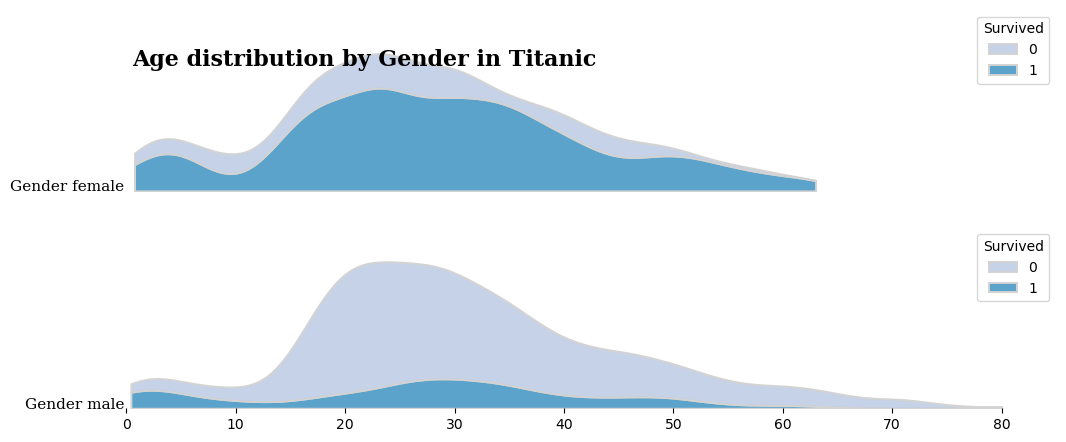

In [9]:
# 觀察性別與年齡間的存活率

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
color_list = ['#FF0000', '#84C1FF', '#FF8F59']
axes = list()
for index, col, c in zip(range(0, len(titanic['Sex'].unique())), sorted(titanic['Sex'].unique()), color_list):
    axes.append(fig.add_subplot(gs[index, 0]))
    
    sns.kdeplot(x='Age', data=titanic[titanic['Sex']==col], fill=True, ax=axes[index], cut=0, bw_method=0.2, lw=1.4,color=c,edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu') 
    
    
    axes[index].set_ylim(0, 0.04)
    axes[index].set_xlim(0, 85)
    axes[index].set_ylim(0, 0.04)
    axes[index].set_xlim(0, 85)
    
    axes[index].set_yticks([])
    
    if index != 1 : axes[index].set_xticks([])
    
    axes[index].set_ylabel('')
    axes[index].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[index].spines[s].set_visible(False)
        
    axes[index].patch.set_alpha(0)
    axes[index].text(-0.2,0,f'Gender {col}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
fig.text(0.13,0.81,"Age distribution by Gender in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show() 

In [10]:
def age_range(num):
    for i in range(1, 100):
        if num < 10*i :  
            return "{} ~ {}".format((i-1)*10, i*10)

# 轉換年紀為年齡範圍
titanic['age_range'] = titanic['Age'].apply(age_range)
titanic_age_range = titanic[['age_range', 'Survived']].groupby('age_range')['Survived'].value_counts().sort_index().unstack().fillna(0)

# 計算存活率
titanic_age_range['Survival rate'] = titanic_age_range[1] / (titanic_age_range[0] + titanic_age_range[1]) * 100

display(titanic_age_range)

Survived       0     1  Survival rate
age_range                            
0 ~ 10      24.0  38.0      61.290323
10 ~ 20     61.0  41.0      40.196078
20 ~ 30    143.0  77.0      35.000000
30 ~ 40     94.0  73.0      43.712575
40 ~ 50     55.0  34.0      38.202247
50 ~ 60     28.0  20.0      41.666667
60 ~ 70     13.0   6.0      31.578947
70 ~ 80      6.0   0.0       0.000000
80 ~ 90      0.0   1.0     100.000000

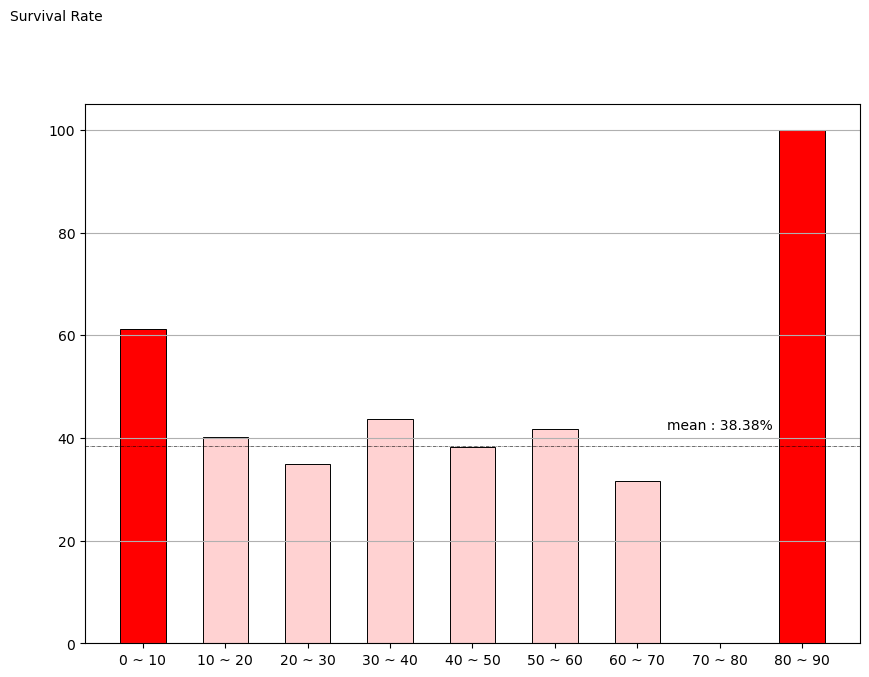

In [11]:
# 觀察哪個年齡區間的存活率最高

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#FFD2D2' for _ in range(9)]
# 存活率最高
color_map[0] = color_map[8] = '#FF0000' 
ax.bar(titanic_age_range['Survival rate'].index, titanic_age_range['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)
survived_mean = titanic['Survived'].mean() *100
ax.axhline(survived_mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {survived_mean :.4}%", 
            xy=('70 ~ 80', survived_mean + 4),
            va = 'center', ha='center',)
fig.text(0.05, 1, 'Survival Rate', fontsize=10)

# 每20歲 畫一條線
grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-')

In [12]:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic['Embarked'] = titanic['Embarked'].map({'S':0, 'C':1, 'Q':2})
# SibSp 統計兄弟或者配偶
# Parch 統計是否有家人或者小孩
# Family = 是否有家人 有一個就算有家人在船上
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic['Family'] = titanic['Family'].apply(lambda x: 1 if x > 1 else 0)

In [13]:
# 查看有家人的乘客人數
titanic['Family'].value_counts()

Family
0    698
1    193
Name: count, dtype: int64

In [14]:
print(titanic.columns)
display(titanic.head(3))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_range', 'Family'],
      dtype='object')


PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   

                                                Name  Sex   Age  SibSp  Parch   
0                            Braund, Mr. Owen Harris    0  22.0      1      0  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   

             Ticket     Fare Cabin  Embarked age_range  Family  
0         A/5 21171   7.2500   NaN         0   20 ~ 30       0  
1          PC 17599  71.2833   C85         1   30 ~ 40       0  
2  STON/O2. 3101282   7.9250   NaN         0   20 ~ 30       0

In [15]:
# 做關聯分析 熱圖
corr = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Family']].corr()
corr

Survived    Pclass       Sex       Age     SibSp     Parch   
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629  \
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked  0.106811  0.045702  0.116569  0.010171 -0.059961 -0.078665   
Family    0.089185  0.043796  0.188116 -0.283448  0.598391  0.772284   

              Fare  Embarked    Family  
Survived  0.257307  0.106811  0.089185  
Pclass   -0.549500  0.045702  0.043796  
Sex       0.182333  0.116569  0.188116  
Age       0.096067  0.010171 -0.283448  
SibSp     0.159651 -0.059961  0.598391  
Parch     0.216225 -0.078665  0.772284  
Fare      1.000000  0.062142  0.166672  
Embarked  0.062142  1.000000 -0.067538  
Family    0.166672 -0.067538  1.000000

<Axes: >

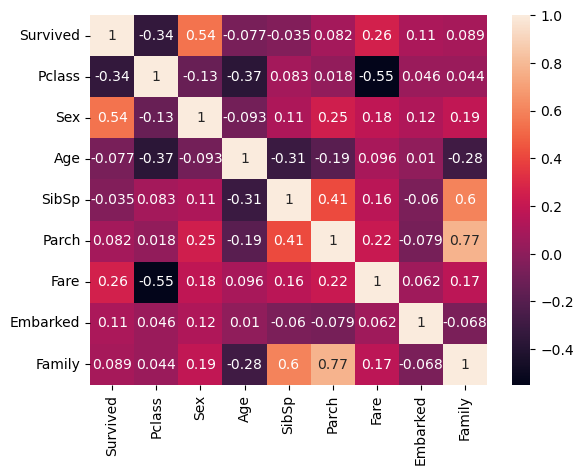

In [16]:
sns.heatmap(corr, annot=True)

<Axes: >

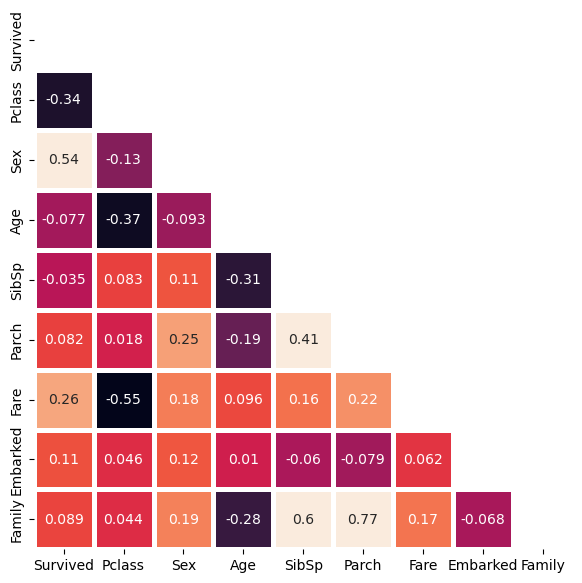

In [17]:
# 優化上面的熱圖
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# 建立一個相同shape的dataframe
mask = np.zeros_like(corr)

# 將上半部變成1當作遮罩
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cbar=False, 
            ax=ax,
            annot=True)

In [18]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_range', 'Family'],
      dtype='object')

In [19]:
import inspect

def varname(var):
    # 取得當前函數的局部變數字典
    frame = inspect.currentframe().f_back.f_locals
    for name, value in frame.items():
        if value is var:
            return name
    return None

def data_preparation(df, drop=True, index_col=0):
    df['age_range'] = df['Age'].apply(age_range)
    df['Family'] = df['SibSp'] + titanic['Parch']
    df['Family'] = df['Family'].apply(lambda x: 1 if x > 1 else 0)
    d_class = pd.get_dummies(df['Pclass'])
    d_sex = pd.get_dummies(df['Sex'])
    d_family = pd.get_dummies(df['Family'])
    d_Embarked = pd.get_dummies(df['Embarked'])
    d_age_range = pd.get_dummies(df['age_range'])
    d_SibSp = pd.get_dummies(df['SibSp'])
    d_Parch = pd.get_dummies(df['Parch'])
    Fare = df[['Fare']]
    feature_col = [d_class, d_sex, d_family, d_Embarked, d_age_range, d_SibSp, d_Parch, Fare]
    if drop:
        print(f'Drop col = {varname(feature_col[index_col])}')
        feature_col.pop(index_col)
    return pd.concat(feature_col,axis=1).replace({True:1, False:0})

In [20]:
titanic = pd.read_csv('train.csv')
X = data_preparation(titanic, drop=False).values
Y = titanic[['Survived']].values

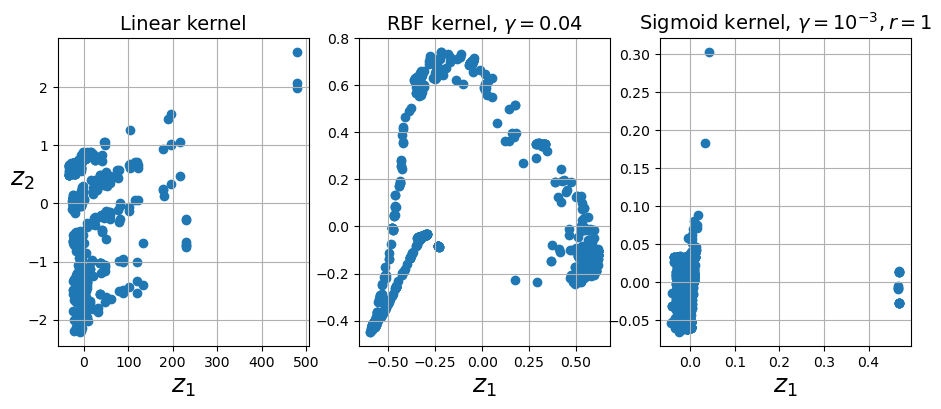

In [21]:
from sklearn.decomposition import KernelPCA

# 觀察投射至2d的結果

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.01, coef0=1, fit_inverse_transform=True)


plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time

# 先跑一次沒降維的測試
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# model = RandomForestClassifier(max_depth = 8, max_leaf_nodes = 9, n_estimators = 300, random_state = 0)
model = GradientBoostingClassifier(learning_rate =  0.01, max_depth = 7,
                                             max_features = 1.0, n_estimators = 200, subsample = 1.0, random_state = 0)

t0 = time.time()
model.fit(x_train, y_train)
t1 = time.time()
print("Cost {:.3f}s".format(t1 - t0))

y_pred = model.predict(x_test)
print("acc = {:.4f}%".format(accuracy_score(y_test, y_pred)))


Cost 0.390s
acc = 0.8156%


In [23]:
# 接著跑降維後的結果

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)


plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    print('======================')
    X_reduced = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)
    t0 = time.time()
    model.fit(x_train, y_train)
    t1 = time.time()
    print("Cost {:.3f}s".format(t1 - t0))

    y_pred = model.predict(x_test)
    print("acc = {:.4f}".format(accuracy_score(y_test, y_pred)))

Cost 0.396s
acc = 0.8268
Cost 0.371s
acc = 0.7430
Cost 0.375s
acc = 0.7598


<Figure size 1100x400 with 0 Axes>

In [24]:
tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)
t0 = time.time()
model.fit(x_train, y_train)
t1 = time.time()
print("Cost {:.3f}s".format(t1 - t0))

y_pred = model.predict(x_test)
print("acc = {:.4f}".format(accuracy_score(y_test, y_pred)))

Cost 0.488s
acc = 0.7430


## 降維後發現有比沒降維結果好1%

## 接著使用最佳的模型來跑特徵剃除, 每次回圈街少一個特徵看預測結果哪個跌最多

In [25]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
model = GradientBoostingClassifier(learning_rate =  0.01, max_depth = 7,
                                             max_features = 1.0, n_estimators = 200, subsample = 1.0, random_state = 0)

for i in range(0, 8):
    X = data_preparation(titanic, index_col=i).values
    Y = titanic[['Survived']].values 
    X_reduced = lin_pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)
    
    t0 = time.time()
    model.fit(x_train, y_train)
    t1 = time.time()
    print("Cost {:.3f}s".format(t1 - t0))

    y_pred = model.predict(x_test)
    print("acc = {:.4f}\n==========\n".format(accuracy_score(y_test, y_pred)))



Drop col = d_class
Cost 0.413s
acc = 0.7486

Drop col = d_sex
Cost 0.385s
acc = 0.7151

Drop col = d_family
Cost 0.391s
acc = 0.7709

Drop col = d_Embarked
Cost 0.394s
acc = 0.7598

Drop col = d_age_range
Cost 0.373s
acc = 0.7821

Drop col = d_SibSp
Cost 0.424s
acc = 0.7821

Drop col = d_Parch
Cost 0.357s
acc = 0.7430

Drop col = Fare
Cost 0.362s
acc = 0.7989



## 以上結果看起來是 特徵影響排名前幾名為 sex>Parch>pclass